In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [33]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [35]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

Сгруппируйте данные по дате, посчитайте количество продаж

In [37]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df.columns = ['Дата', 'Общее количество продаж']
print(grouped_df)

          Дата  Общее количество продаж
0   2018-01-04                     3734
1   2018-01-05                     3643
2   2018-01-06                     3193
3   2018-01-07                     3298
4   2018-01-09                     4055
..         ...                      ...
200 2018-08-26                     5302
201 2018-08-28                     5983
202 2018-08-29                     4969
203 2018-08-30                     4648
204 2018-08-31                     4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [39]:
print(grouped_df.head())

        Дата  Общее количество продаж
0 2018-01-04                     3734
1 2018-01-05                     3643
2 2018-01-06                     3193
3 2018-01-07                     3298
4 2018-01-09                     4055


Нарисуйте график продаж у `grouped_df`

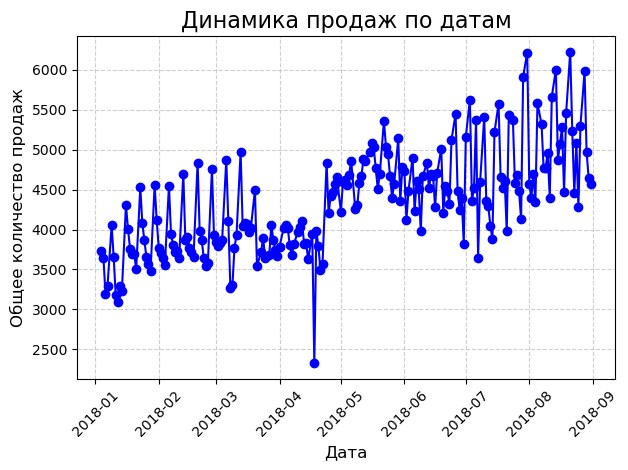

In [41]:
plt.plot(grouped_df['Дата'], grouped_df['Общее количество продаж'], marker='o', linestyle='-', color='blue')

plt.title('Динамика продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Общее количество продаж', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Описание графика:
На графике изображена динамика продаж по датам, где ось X представляет собой временные промежутки (даты), а ось Y — общее количество продаж товаров за 
каждый день. График представлен в виде линии, соединяющей точки, отражающие продажи в каждый день.
Тренды:
В начале периода продажи постепенно увеличивались, что можно интерпретировать как стабильный рост интереса к товару или увеличение спроса.
Однако в период с марта по апрель линия графика резко опускается вниз, что представляет собой значительное падение продаж. 
Этот резкий спад может быть связан с несколькими возможными факторами, такими как сезонные колебания, изменения в рыночной ситуации или 
проблемы с поставками. Возможно, в этот период произошло какое-то внешнее событие (например, экономический спад, отмена акции или другие влияния), 
которое вызвало снижение интереса.
В мае динамика снова меняется: линия резко поднимается вверх, что может указывать на восстановление интереса к продукту. 
Рост продаж в мае может быть вызван, например, сезонным спросом, проведением рекламной кампании, запуском акций или улучшением рыночных условий. 
Увеличение продаж также может быть связано с окончанием временных трудностей, таких как проблемы с поставками или другими внешними факторами.
Аномалии и резкие изменения:
На графике особенно выделяется резкий спад с марта по апрель. Этот момент на графике может указывать на некую краткосрочную аномалию, 
которая требует дополнительного анализа. Подобные падения могут быть вызваны как внутренними факторами (например, проблемы с запасами), 
так и внешними (например, экономическими факторами или конкурентным давлением).
Восстановление в мае также выглядит значительным и вызывает вопросы относительно факторов, которые могли бы способствовать такому росту. 
Это может быть связано с изменением стратегии продаж, улучшением условий рынка или изменением внешних факторов.
Общие выводы:
График показывает явную зависимость от времени, где можно наблюдать как значительное падение, так и восстановление продаж. 
Падение с марта по апрель может потребовать детального анализа причин, а рост в мае может свидетельствовать о возвращении положительных тенденций.
Возможно, для более глубокого анализа нужно будет изучить, что происходило в марте и апреле: были ли сезонные или рыночные факторы, 
которые повлияли на снижение продаж.
Период с марта по апрель выглядит как кризисный или проблемный этап, в то время как май демонстрирует оптимистичный тренд.
Заключение: График хорошо иллюстрирует динамику продаж с временными колебаниями. Явное падение в марте-апреле и последующий рост в мае могут 
быть связаны с внутренними или внешними воздействиями. Такие изменения дают возможность для дальнейшего анализа причин спадов и роста, а также для 
разработки мероприятий по стабилизации продаж в будущих периодах.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [43]:
Q1 = df['Количество'].quantile(0.25)  
Q3 = df['Количество'].quantile(0.75)  
IQR = Q3 - Q1                         

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers[outliers['Количество'] == outliers['Количество'].max()]
print("Строка с максимальным выбросом:")
print(max_outlier)

Строка с максимальным выбросом:
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [45]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

df = df[df['Дата'].dt.month.isin([6, 7, 8])]

df['День_недели'] = df['Дата'].dt.dayofweek

df_wednesdays = df[df['День_недели'] == 2]

top_sales = df_wednesdays.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()

top_products_per_warehouse = top_sales.loc[top_sales.groupby('Склад')['Количество'].idxmax()]
print(top_products_per_warehouse)

    Склад Номенклатура  Количество
1       1    product_1        2981
24      2    product_1        2887
46      3    product_1        2267
69      4    product_1        2385
92      5    product_1        1956


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

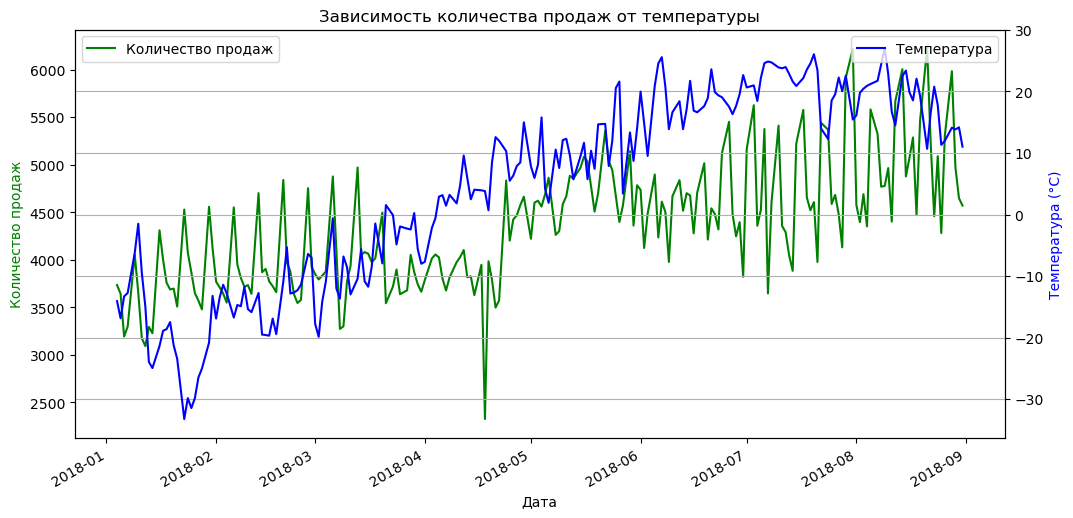

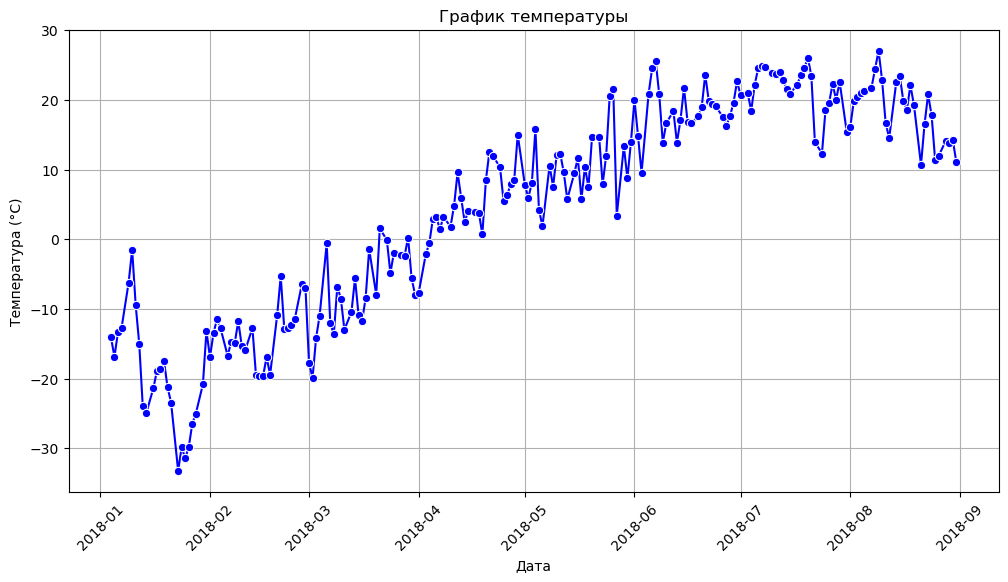

In [49]:
weather_df = pd.read_csv('weather.csv', delimiter=';', encoding='ANSI')

weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d.%m.%Y %H:%M')

weather_df['Дата'] = weather_df['Дата'].dt.date 
weather_df_daily = weather_df.groupby('Дата')['T'].mean().reset_index()

sales_df = pd.read_csv('data.csv')
sales_df['Дата'] = pd.to_datetime(sales_df['Дата'], format='%Y-%m-%d')

grouped_df = sales_df.groupby('Дата')['Количество'].sum().reset_index()

grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'], format='%Y-%m-%d')
weather_df_daily['Дата'] = pd.to_datetime(weather_df_daily['Дата'], format='%Y-%m-%d')

merged_df = pd.merge(grouped_df, weather_df_daily, on='Дата', how='left')

# Рисуем графики
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(merged_df['Дата'], merged_df['Количество'], 'g-', label='Количество продаж')
ax2.plot(merged_df['Дата'], merged_df['T'], 'b-', label='Температура')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='g')
ax2.set_ylabel('Температура (°C)', color='b')
plt.title('Зависимость количества продаж от температуры')
fig.autofmt_xdate()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid()
plt.show()

# Отдельный график температуры
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Дата', y='T', color='b', marker='o')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('График температуры')
plt.xticks(rotation=45)
plt.grid()
plt.show()